In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drugdata = pd.read_csv(mouse_drug_data_to_load)
ctrial_drugdata = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_data = pd.merge(mouse_drugdata,ctrial_drugdata,how="outer",on="Mouse ID")

# Display the data table for preview
#print(mouse_drugdata.head())

#print(ctrial_drugdata.head())

combined_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
gp_drug_time = combined_data.groupby(["Drug","Timepoint"])

# Convert to DataFrame
mean_tvol_df = gp_drug_time.agg({'Tumor Volume (mm3)': np.mean}).reset_index()
mean_tvol_df.columns.values[2] = "Average Tumor Vol (mm3)"

# Preview DataFrame
mean_tvol_df.head()

,Drug,Timepoint,Average Tumor Vol (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
sem_tvol_df = gp_drug_time.agg({'Tumor Volume (mm3)': sem}).reset_index()
sem_tvol_df.columns.values[2] = "Standard Error of Tumor Vol (mm3)"
# Preview DataFrame
sem_tvol_df.head()


,Drug,Timepoint,Standard Error of Tumor Vol (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
mean_tvol_df_ref = mean_tvol_df.set_index(['Timepoint','Drug']).unstack(level=-1)
sem_tvol_df_ref = sem_tvol_df.set_index(['Timepoint','Drug']).unstack(level=-1)


In [5]:
print(sem_tvol_df_ref.keys())
print(mean_tvol_df_ref.keys())
iindex = list(mean_tvol_df_ref.keys())

iindex[0][0]

MultiIndex(levels=[['Standard Error of Tumor Vol (mm3)'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])
MultiIndex(levels=[['Average Tumor Vol (mm3)'], ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]],
           names=[None, 'Drug'])


'Average Tumor Vol (mm3)'

The following are the list of drugs: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
we only plot the following drugs: ['Ceftamin', 'Infubinol', 'Ketapril'] 


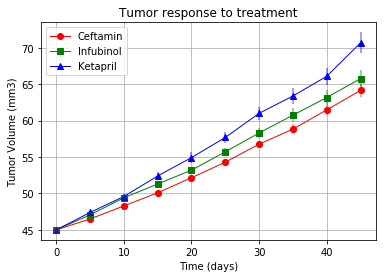

In [6]:
# Generate the Plot (with Error Bars)



#function plotdata takes the list of data and error(if no error, plot only the percentage change), name of the title and x,y lables
def plot_data(data_and_error,title,xlabl,ylabl):
    
    data_df = data_and_error[0]
    data_df_index = list(data_df.keys())
    list_of_drugs = [name[1] for name in data_df_index]
    title_data_measurement = data_df_index[0][0]
    
    
    
    print(f"The following are the list of drugs: {list_of_drugs}")
    list_of_drugs_plot = [list_of_drugs[i] for i in range(1,4)]
    print(f"we only plot the following drugs: {list_of_drugs_plot} ")
    fig, ax = plt.subplots()

    markers =["o","s","^"]
    colors = ["r","g","b"]

    legend_list = []

    for index,drug_name in enumerate(list_of_drugs_plot):

        x_axis = [0,5,10,15,20,25,30,35,40,45]
        drug_size = data_df[title_data_measurement][drug_name]
        if len(data_and_error)==2:
            
            error_df =data_and_error[1]
            error_df_index =list(error_df.keys())
            title_error = error_df_index[0][0]
            
            drug_sem = error_df[title_error][drug_name]
            ax.errorbar(x_axis, drug_size, yerr=drug_sem, fmt=markers[index], color=colors[index], alpha=0.5)
            leg, = ax.plot(x_axis, drug_size, linewidth=1, marker=markers[index], color=colors[index])
            legend_list.append(leg)
        else:
            
            percentage = drug_size/max(drug_size)*100
            ax.errorbar(x_axis, percentage, fmt=markers[index], color=colors[index], alpha=0.5)
            leg, = ax.plot(x_axis, percentage, linewidth=1, marker=markers[index], color=colors[index])
            legend_list.append(leg)    
    
    plt.title(title)
    plt.grid()
    plt.xlabel(xlabl)
    plt.ylabel(ylabl)
    plt.legend(handles = legend_list)
    # Save the Figure    
    #fig.savefig(title+'.png')
    # Show the Figure
    plt.show()

plot_data([mean_tvol_df_ref,sem_tvol_df_ref],"Tumor response to treatment","Time (days)","Tumor Volume (mm3)")

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame
mean_met_df = gp_drug_time.agg({'Metastatic Sites': np.mean}).reset_index()
mean_met_df.columns.values[2] = "Metastatic Sites"

# Preview DataFrame
mean_met_df.head()
# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
sem_met_df = gp_drug_time.agg({'Metastatic Sites': sem}).reset_index()
sem_met_df.columns.values[2] = "Standard Error of Metastatic"
# Preview DataFrame
sem_met_df.head()

,Drug,Timepoint,Standard Error of Metastatic
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_df_ref = mean_met_df.set_index(['Timepoint','Drug']).unstack(level=-1)
sem_met_df_ref = sem_met_df.set_index(['Timepoint','Drug']).unstack(level=-1)
# Preview that Reformatting worked
sem_met_df_ref.head()
#sem_met_df_ref.keys()


Standard Error of Metastatic                                \
Drug                         Capomulin  Ceftamin Infubinol  Ketapril   
Timepoint                                                              
0                             0.000000  0.000000  0.000000  0.000000   
5                             0.074833  0.108588  0.091652  0.098100   
10                            0.125433  0.152177  0.159364  0.142018   
15                            0.132048  0.180625  0.194015  0.191381   
20                            0.161621  0.241034  0.234801  0.236680   

                                                                       
Drug       Naftisol   Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                              
0          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.093618  0.100947  0.095219  0.066332  0.087178  0.077709  
10         0.163577  0.115261  0.105690  0.090289  0.123672  0.109109  
15         0.158651  0.190221  0.136377  0.115261  0.153439  0.111677  
20         0.181731  0.234064  0.171499  0.119430  0.200905  0.166378

The following are the list of drugs: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
we only plot the following drugs: ['Ceftamin', 'Infubinol', 'Ketapril'] 


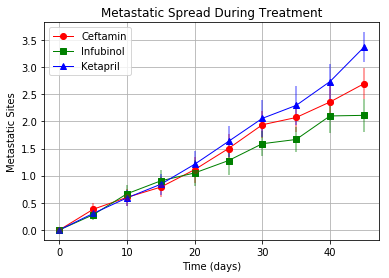

In [10]:
plot_data([mean_met_df_ref,sem_met_df_ref],"Metastatic Spread During Treatment","Time (days)","Metastatic Sites")

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame
mouse_count_df = gp_drug_time.count().drop(['Tumor Volume (mm3)', 'Metastatic Sites'], axis=1).reset_index()

# Preview DataFrame
mouse_count_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_df_ref = mouse_count_df.set_index(['Timepoint','Drug']).unstack(level=-1)

# Preview the Data Frame
mouse_count_df_ref.head()


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

The following are the list of drugs: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
we only plot the following drugs: ['Ceftamin', 'Infubinol', 'Ketapril'] 


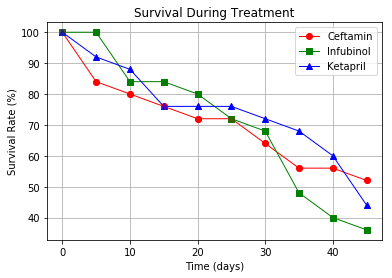

In [13]:
plot_data([mouse_count_df_ref],"Survival During Treatment","Time (days)","Survival Rate (%)")

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug

# Display the data to confirm
list_of_drugs = [name[1] for name in list(mean_tvol_df_ref.keys())]
Mean_Tumor_Volume = gp_drug_time["Tumor Volume (mm3)"].mean()
records = [pd.Series(Mean_Tumor_Volume[name]).reset_index()["Tumor Volume (mm3)"] for name in list_of_drugs]
#list_of_drugs
changes = [(record.iloc[-1]-record.iloc[0])/record.iloc[0]*100 for record in records]

changes_df = pd.DataFrame({"Drugs": list_of_drugs,"%Changes":changes})
changes_df 

,Drugs,%Changes
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


['g', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'r']


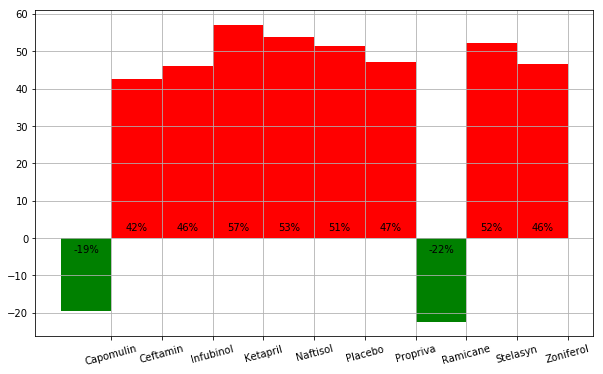

In [47]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs

colors = ['r' if change>0 else 'g' for change in changes]
print(colors)


width = 1

fig, ax = plt.subplots(1,1,figsize=(10,6))



x_axis = changes_df.index
tick_locations = [value for value in x_axis]

bars = ax.bar(x_axis, changes_df["%Changes"],width=-1, color=colors, align="edge")
plt.xticks(tick_locations, changes_df["Drugs"], rotation=15)


    
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    #(y_bottom, y_top) = ax.get_ylim()
    #y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        width = rect.get_width()
        left = rect.get_x()
        bottom = rect.get_y()
        # Fraction of axis height taken up by this rectangle
        #p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        '''
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)
        '''
        ax.text(left + width/2.,
                
                bottom+3*np.sign(height)-1.5,
                
                '%d' % int(height)+'%',
                ha='center', va='bottom')

        
autolabel(bars,ax)
# Save the Figure
plt.grid()
# Show the Figure
plt.show()